In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Task 1

In [58]:
def task1(imname):
    # Load the image
    image_path = f'images//{imname}'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    # Define the masks for line detection
    horizontal_mask = np.array([[-1, -1, -1],
                                [ 2,  2,  2],
                                [-1, -1, -1]])

    vertical_mask = np.array([[-1,  2, -1],
                            [-1,  2, -1],
                            [-1,  2, -1]])

    diag_45_mask = np.array([[-1, -1,  2],
                            [-1,  2, -1],
                            [ 2, -1, -1]])

    diag_neg45_mask = np.array([[ 2, -1, -1],
                                [-1,  2, -1],
                                [-1, -1,  2]])


    # Apply convolution using the masks
    horizontal_edges = cv2.filter2D(image, -1, horizontal_mask)
    vertical_edges = cv2.filter2D(image, -1, vertical_mask)
    diag_45_edges = cv2.filter2D(image, -1, diag_45_mask)
    diag_neg45_edges = cv2.filter2D(image, -1, diag_neg45_mask)
        


    # Display the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title("Horizontal Lines")
    plt.imshow(horizontal_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Vertical Lines")
    plt.imshow(vertical_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title("Diagonal Lines (+45°)")
    plt.imshow(diag_45_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title("Diagonal Lines (-45°)")
    plt.imshow(diag_neg45_edges, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


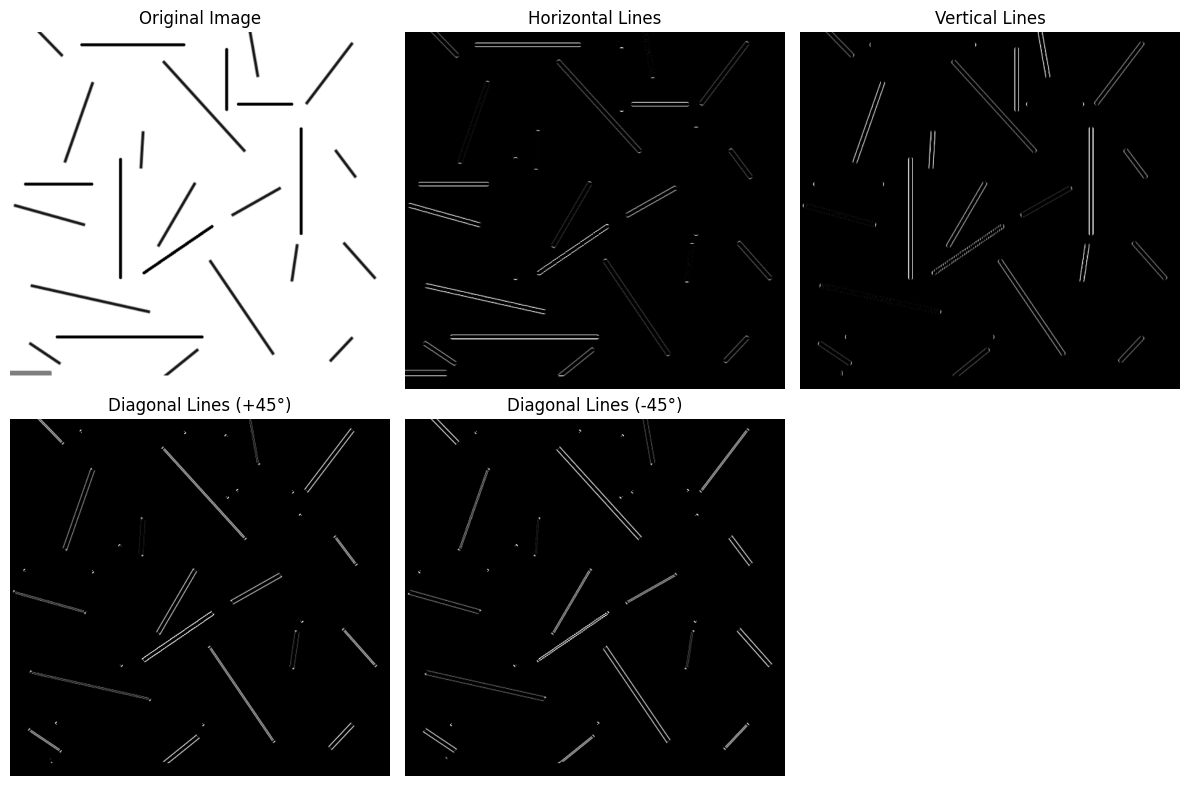

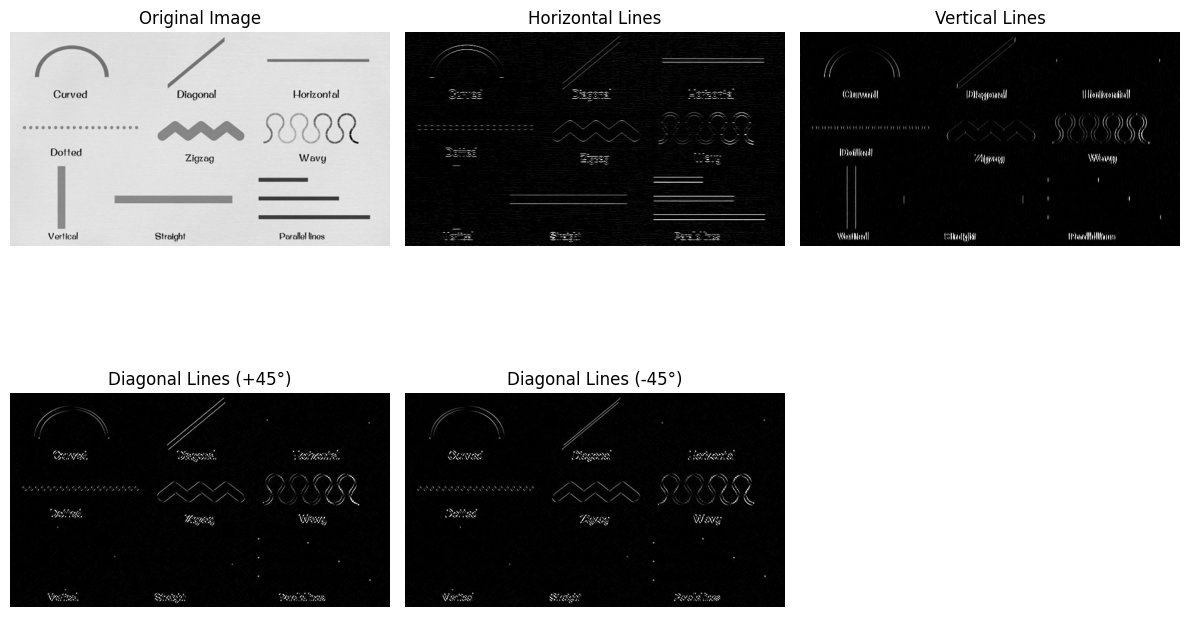

In [59]:
task1('image1.png')
task1('image2.png')



## Task 2

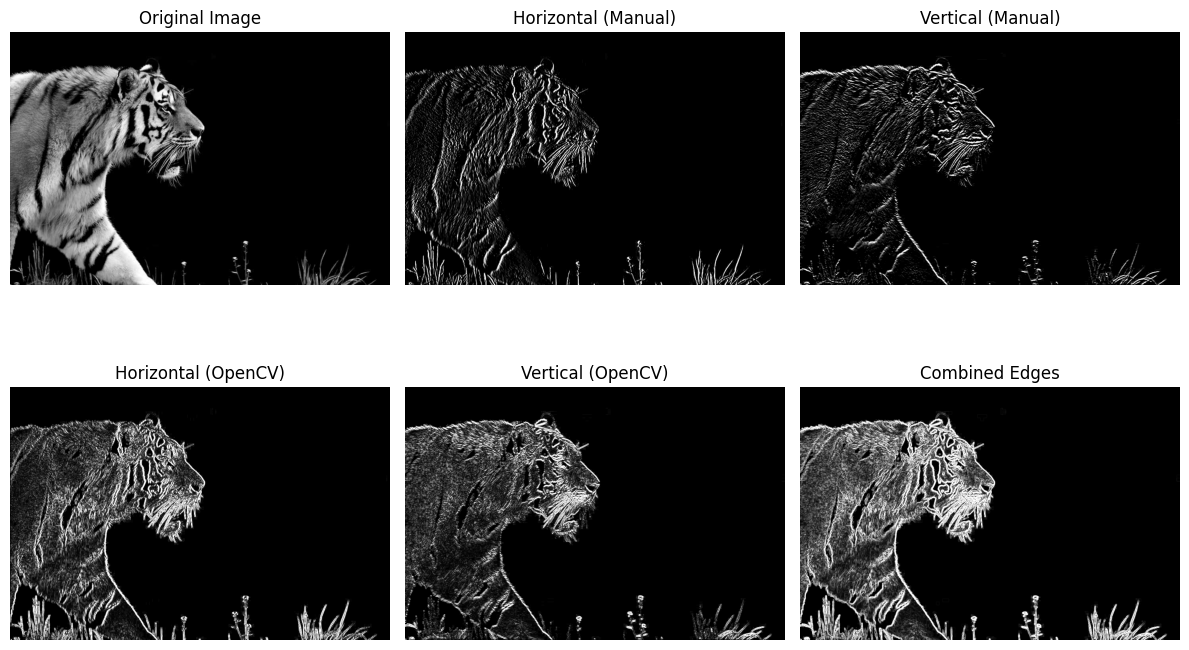

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'images/image3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# # Define Sobel filters manually
# sobel_x = np.array([[-1, -1, -1],
#                     [ 2,  2,  2],
#                     [-1, -1, -1]])  # Horizontal edges

# sobel_y = np.array([[-1, 2, -1],
#                     [-1, 2, -1],
#                     [-1, 2, -1]])  # Vertical edges

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])  # Horizontal edges

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])  # Vertical edges

# Apply manual Sobel filters using convolution
horizontal_edges_manual = cv2.filter2D(image, -1, sobel_x)
vertical_edges_manual = cv2.filter2D(image, -1, sobel_y)
combined_edges_manual = cv2.addWeighted(horizontal_edges_manual, 0.5, vertical_edges_manual, 0.5, 0)

# Apply Sobel filters using OpenCV functions
horizontal_edges_cv = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
vertical_edges_cv = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
combined_edges_cv = cv2.magnitude(horizontal_edges_cv, vertical_edges_cv)

# Convert OpenCV results to uint8
horizontal_edges_cv = cv2.convertScaleAbs(horizontal_edges_cv)
vertical_edges_cv = cv2.convertScaleAbs(vertical_edges_cv)
combined_edges_cv = cv2.convertScaleAbs(combined_edges_cv)

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Horizontal (Manual)")
plt.imshow(horizontal_edges_manual, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Vertical (Manual)")
plt.imshow(vertical_edges_manual, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Horizontal (OpenCV)")
plt.imshow(horizontal_edges_cv, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Vertical (OpenCV)")
plt.imshow(vertical_edges_cv, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Combined Edges")
plt.imshow(combined_edges_cv, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 3

(np.float64(-0.5), np.float64(550.5), np.float64(443.5), np.float64(-0.5))

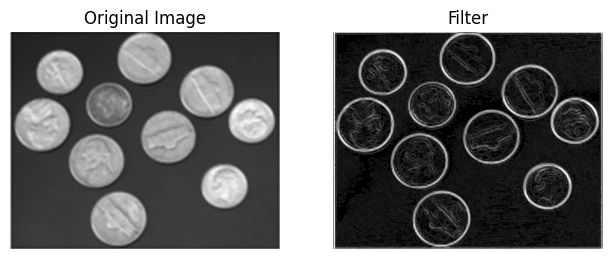

In [ ]:

image_path = 'images/image4.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

horizontal_edges_manual = cv2.filter2D(image, -1, sobel_x)
vertical_edges_manual = cv2.filter2D(image, -1, sobel_y)
combined_edges_manual = cv2.addWeighted(horizontal_edges_manual, 0.5, vertical_edges_manual, 0.5, 0)


horizontal_edges_cv = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
vertical_edges_cv = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
combined_edges_cv = cv2.magnitude(horizontal_edges_cv, vertical_edges_cv)

horizontal_edges_cv = cv2.convertScaleAbs(horizontal_edges_cv)
vertical_edges_cv = cv2.convertScaleAbs(vertical_edges_cv)
combined_edges_cv = cv2.convertScaleAbs(combined_edges_cv)


plt.figure(figsize=(16, 8))

plt.subplot(2,4,1)

plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2,4,2)

plt.title("Filter")
plt.imshow(combined_edges_cv, cmap='gray')
plt.axis('off')